# Ratio Analysis

#### Sources

Gross Profit Margin: https://www.statista.com/statistics/1346629/hotel-tourism-industry-gross-margin-worldwide/#:~:text=The%20gross%20margin%20measures%20the,tourism%20industry%20was%2061.07%20percent. 

Operating Margin: https://www.statista.com/statistics/1346659/hotel-tourism-industry-operating-profit-margin-worldwide/#:~:text=The%20operating%20profit%20margin%20measures,tourism%20industry%20was%2020.79%20percent.

Net Margin: https://www.siteminder.com/r/hotel-profit-margin/#:~:text=If%20we%20are%20talking%20about,closer%20to%205%2D10%25.

P/E Ratio: https://csimarket.com/Industry/industry_valuation_ttm.php?pe&ind=906

P/B Ratio: https://www.macrotrends.net/stocks/charts/HST/host-hotels-resorts/price-book#:~:text=Host%20Hotels%20%26%20Resorts%20average%20price%2Fbook%20ratio%20for%202022%20was,a%206.59%25%20increase%20from%202021.

Interest Coverage: https://www.cbre.com/insights/briefs/us-hotel-owners-eyeing-interest-coverage#:~:text=The%20relatively%20strong%20recovery%20in,was%20a%20robust%203.70x.

Debt-to-Equity: https://www.macrotrends.net/stocks/charts/HST/host-hotels-resorts/debt-equity-ratio#:~:text=Host%20Hotels%20%26%20Resorts%20average%20debt%2Fequity%20ratio%20for%202022%20was,a%208.75%25%20decline%20from%202020.

Debt Ratio: https://www.readyratios.com/sec/industry/7011

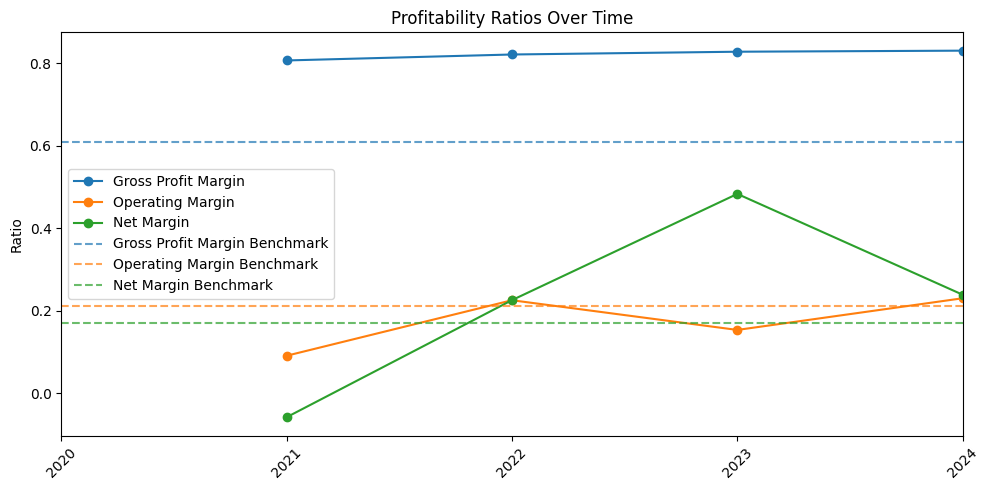

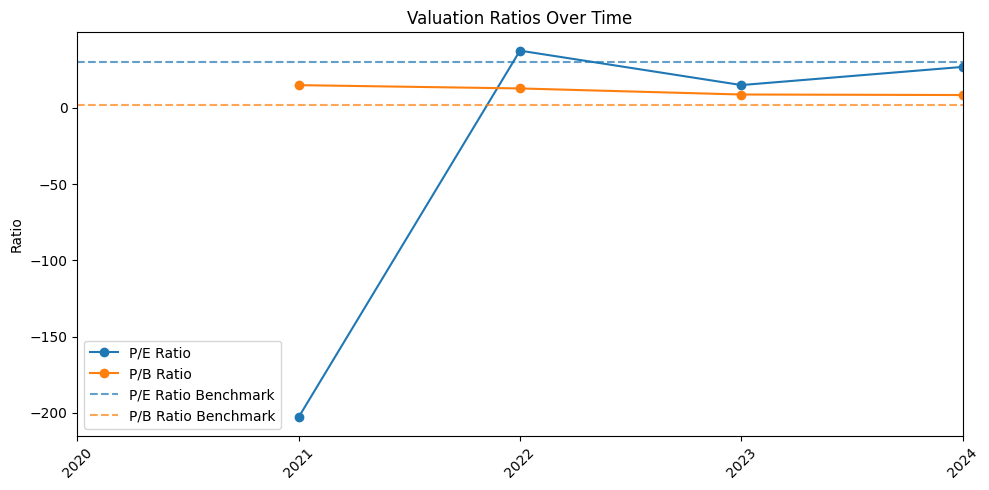

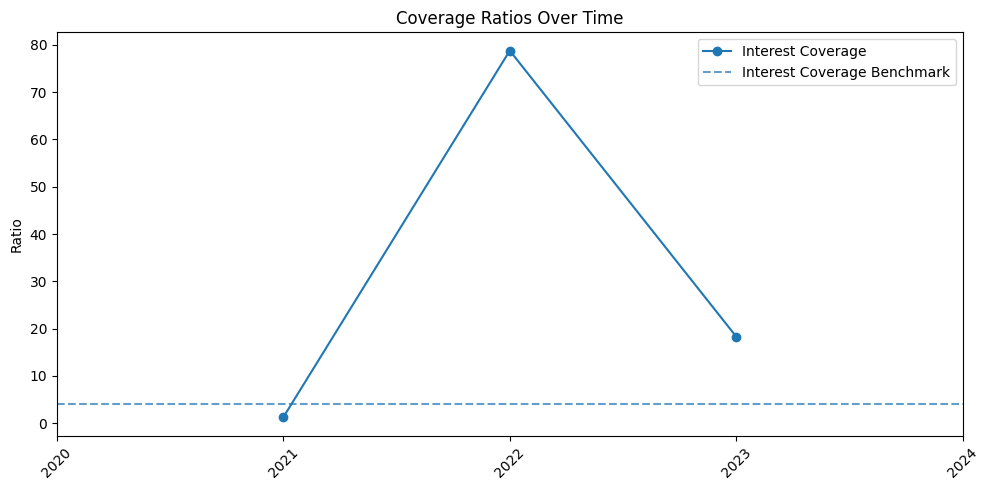

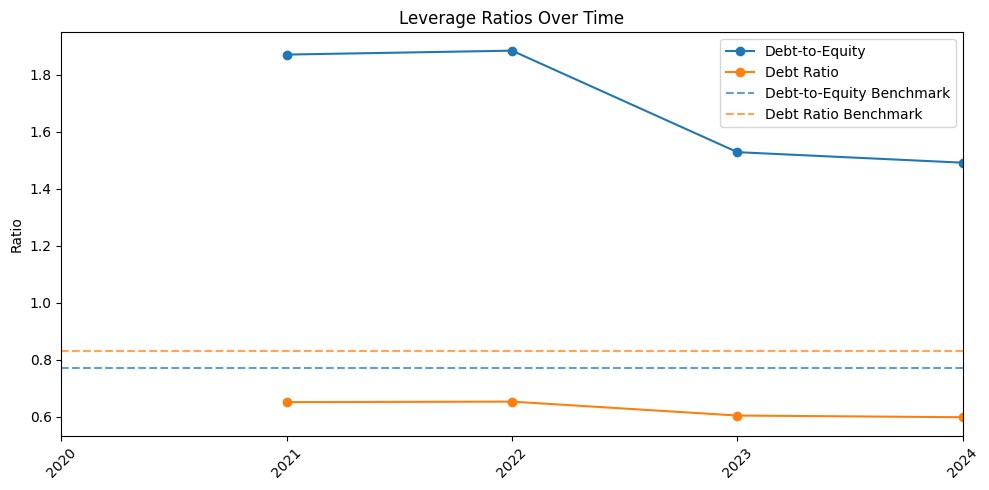

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Fetch data for Airbnb (ABNB) ---
ticker = yf.Ticker("ABNB")
bs = ticker.balance_sheet.transpose()
inc = ticker.financials.transpose()
# get share count and price
shares = bs['Ordinary Shares Number']
price = ticker.history(period="1d")['Close'].iloc[-1]

# convert index to datetime
bs.index = pd.to_datetime(bs.index)
inc.index = pd.to_datetime(inc.index)

# calculate shareholder equity
equity = bs['Total Assets'] - bs['Total Liabilities Net Minority Interest']

# --- 2. Compute ratios by category ---

# Profitability
gross_profit = inc['Gross Profit']
revenue = inc['Total Revenue']
op_income = inc['Operating Income']
net_income = inc['Net Income']

profitability = pd.DataFrame({
    'Gross Profit Margin': gross_profit / revenue,
    'Operating Margin': op_income / revenue,
    'Net Margin': net_income / revenue,
})

# Valuation (using most recent EPS/book data for trailing P/E and P/B)
eps = net_income / shares
book_value_per_share = equity / shares

valuation = pd.DataFrame({
    'P/E Ratio': price / eps,
    'P/B Ratio': price / book_value_per_share,
}, index=eps.index)

# Coverage
interest_expense = inc['Interest Expense']
coverage = pd.DataFrame({
    'Interest Coverage': op_income.abs() / interest_expense.abs()
})

# Leverage
leverage = pd.DataFrame({
    'Debt-to-Equity': bs['Total Liabilities Net Minority Interest'] / equity,
    'Debt Ratio': bs['Total Liabilities Net Minority Interest'] / bs['Total Assets'],
})

# --- 3. Define industry benchmarks (example placeholders) ---
benchmarks = {
    'Gross Profit Margin': 0.61,
    'Operating Margin': 0.21,
    'Net Margin': 0.17,
    'P/E Ratio': 30,
    'P/B Ratio': 2,
    'Interest Coverage': 4,
    'Debt-to-Equity': 0.77,
    'Debt Ratio': 0.83,
}

# --- 4. Plot each category with benchmark lines ---
def plot_with_benchmark(df, title, ylabel):
    ax = df.plot(marker='o', figsize=(10, 5))
    
    # For each series, grab its line color and draw the matching benchmark
    for i, col in enumerate(df.columns):
        if col in benchmarks:
            # the plotted lines are in the same order as df.columns
            series_line = ax.lines[i]
            color = series_line.get_color()
            
            ax.axhline(
                y=benchmarks[col],
                color=color,
                linestyle='--',
                label=f'{col} Benchmark',
                alpha=0.7
            )
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_with_benchmark(profitability,    'Profitability Ratios Over Time', 'Ratio')
plot_with_benchmark(valuation,        'Valuation Ratios Over Time',       'Ratio')
plot_with_benchmark(coverage,         'Coverage Ratios Over Time',        'Ratio')
plot_with_benchmark(leverage,         'Leverage Ratios Over Time',        'Ratio')
